In [1]:
#!python3 -m pip install python_speech_features # Install PSF specifically on python3.
import os
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import h5py
from python_speech_features import mfcc, fbank
import matplotlib.pyplot as plt
import tracemalloc
from scipy import signal
# Import fft
from scipy.fftpack import fft


tracemalloc.start() # Enable memory profiling

## Find files, and list structure


In [2]:

# OS walk through the directory to find the files
#root_dir = '//uni.au.dk/dfs/Tech_EarEEG/Students/Msc2022_BCM_AkselStark'
root_dir = 'bcm_behaviour_data_multi_subject'
data = [] # Empty list to store all hdf5 files in the directory

for subdir, dirs, files in sorted(os.walk(root_dir)):
    for file in files:
        if "hdf5" in file:
            print("\n\n\n")
            # Load the hdf5 file, and append to the list
            print(file)
            
            data.append(h5py.File(os.path.join(subdir, file), 'r'))
            
            print(f'{subdir}/{file}') # Print the filename
            keylist = list(data[0].keys())
            print( keylist) # Print the keys of the hdf5 file
            
            
#data = data[:3] # Create subset of the files, to create training and validation set
del data[2]




for i,j in enumerate(data):
    print("\n\n\n")
    print(f'Index of the hdf5 file: {i}') # Print the index of the hdf5 file
    for key in keylist:
        print(key)
        try: # Try to print the keys. If it fails, print the data
            print(f"    {list(data[i][key].keys())}")
        except:
            print("    No subkeys")
            print(f"    {np.array(data[i][key])}")
            s = data[i][key]
                        
                        





2022-09-20_15-57-37.hdf5
bcm_behaviour_data_multi_subject/subject1/2022-09-20_15-57-37.hdf5
['DAQ970A', 'streaminfo']




2022-09-20_15-38-11.hdf5
bcm_behaviour_data_multi_subject/subject1/2022-09-20_15-38-11.hdf5
['DAQ970A', 'streaminfo']




2022-09-20_15-18-27.hdf5
bcm_behaviour_data_multi_subject/subject1/2022-09-20_15-18-27.hdf5
['DAQ970A', 'streaminfo']




2022-09-20_14-58-39.hdf5
bcm_behaviour_data_multi_subject/subject1/2022-09-20_14-58-39.hdf5
['DAQ970A', 'streaminfo']




2022-11-09_14-34-16.hdf5
bcm_behaviour_data_multi_subject/subject2/2022-11-09_14-34-16.hdf5
['DAQ970A', 'streaminfo']




2022-11-09_14-52-7.hdf5
bcm_behaviour_data_multi_subject/subject2/2022-11-09_14-52-7.hdf5
['DAQ970A', 'streaminfo']




2022-11-09_13-56-0.hdf5
bcm_behaviour_data_multi_subject/subject2/2022-11-09_13-56-0.hdf5
['DAQ970A', 'streaminfo']




2022-11-09_14-15-6.hdf5
bcm_behaviour_data_multi_subject/subject2/2022-11-09_14-15-6.hdf5
['DAQ970A', 'streaminfo']




2022-11-09_16-7-9.hdf5
bcm

In [3]:
print(f'Memory usage: {tracemalloc.get_traced_memory()[0]/1000000} MB\n')
data_bcm = []
labels_bcm = []
for file in data:
    print(f"data    {file}")
    data_full = np.array(file['DAQ970A']['data'])
    data_bcm.append(data_full[:,0])
    data_bcm.append(data_full[:,1])
    print(f'Memory usage: {tracemalloc.get_traced_memory()[0]/1000000} MB\n')

    print(f"Labels    {file}")
    labels_bcm.append(file['DAQ970A']['data'][:,3])
    print(f'Memory usage: {tracemalloc.get_traced_memory()[0]/1000000} MB\n')

Memory usage: 0.171031 MB

data    <HDF5 file "2022-09-20_15-57-37.hdf5" (mode r)>
Memory usage: 784.170595 MB

Labels    <HDF5 file "2022-09-20_15-57-37.hdf5" (mode r)>
Memory usage: 980.172659 MB

data    <HDF5 file "2022-09-20_15-38-11.hdf5" (mode r)>
Memory usage: 1764.174587 MB

Labels    <HDF5 file "2022-09-20_15-38-11.hdf5" (mode r)>
Memory usage: 1960.174699 MB

data    <HDF5 file "2022-09-20_14-58-39.hdf5" (mode r)>
Memory usage: 2744.175347 MB

Labels    <HDF5 file "2022-09-20_14-58-39.hdf5" (mode r)>
Memory usage: 2940.175459 MB

data    <HDF5 file "2022-11-09_14-34-16.hdf5" (mode r)>
Memory usage: 3724.176075 MB

Labels    <HDF5 file "2022-11-09_14-34-16.hdf5" (mode r)>
Memory usage: 3920.176187 MB

data    <HDF5 file "2022-11-09_14-52-7.hdf5" (mode r)>
Memory usage: 4704.176867 MB

Labels    <HDF5 file "2022-11-09_14-52-7.hdf5" (mode r)>
Memory usage: 4900.177011 MB

data    <HDF5 file "2022-11-09_13-56-0.hdf5" (mode r)>
Memory usage: 5684.177627 MB

Labels    <HDF5 file "

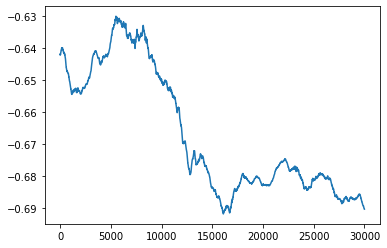

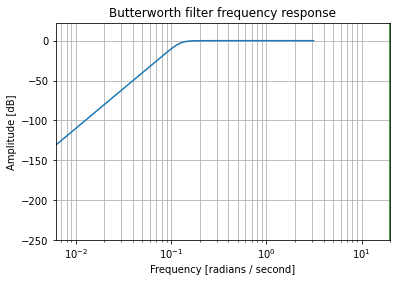

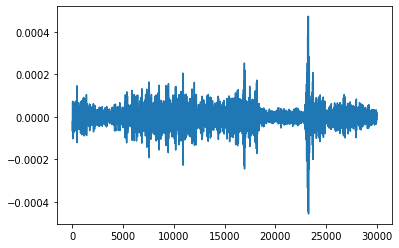

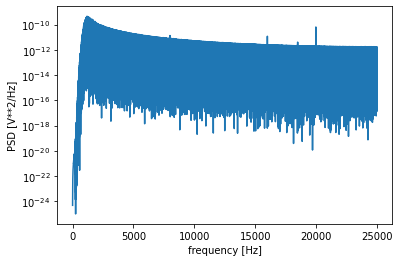

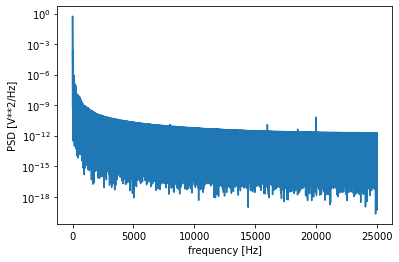

In [38]:
# Plot the signal
plt.plot(data_bcm[0][0:30000])
plt.show()


# Create a filtered signal, with high pass filter with cutoff frequency of 20 Hz
import scipy.signal as signal
b, a = signal.butter(5, 20, btype='highpass', fs=1000)
filtered_data = signal.filtfilt(b, a, data_bcm[0])

# Plot the filter response of the high pass filter
w, h = signal.freqz(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(20, color='green') # cutoff frequency
plt.show()


# Plot the filtered signal
plt.plot(filtered_data[0:30000])
plt.show()

# Plot the spectrum of the filtered signal and the original signal
f, Pxx_den = signal.periodogram(filtered_data, 50000)
plt.semilogy(f[50:], Pxx_den[50:])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

f, Pxx_den = signal.periodogram(data_bcm[0], 50000)
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


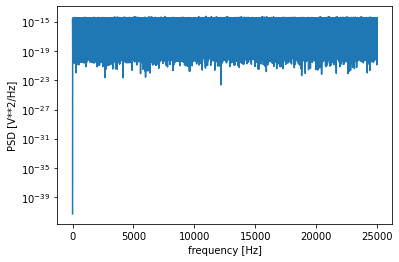

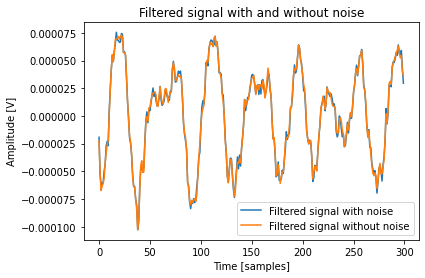

In [35]:

# 
noise = np.random.normal(0,0.02783*0.0001,len(data_bcm[0])) # 0.02783 is the standard deviation of the data, hardcoded to makes sure noise is similar across classes
# Plot the power spectrum of the noise
f, Pxx_den = signal.periodogram(noise, 50000)
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

filtered_data_noise = filtered_data + noise


# Plot a segment of the filtered signal with and without noise
plt.plot(filtered_data_noise[0:300])
plt.plot(filtered_data[0:300])
# Add labels
plt.title('Filtered signal with and without noise')
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude [V]')
plt.legend(['Filtered signal with noise', 'Filtered signal without noise'])
plt.show()
plt.show()


In [14]:
last_decoded = -500000
label_index_list = [] # List of the indices of the labels
for i, j in enumerate(np.rint(labels_bcm[0])):
    
    if int(j) and (i > last_decoded+50000*8):
        #print(manchester_decode(np.rint(labels_bcm[0][i-900:i+100000][0::2480])))
        print(f"i: {i}")
        print(f"Time: {i/50000} s")
        last_decoded = i
        
        label_index_list.append(i)

i: 21350
Time: 0.427 s
i: 521347
Time: 10.42694 s
i: 1021344
Time: 20.42688 s
i: 1521341
Time: 30.42682 s
i: 2021339
Time: 40.42678 s
i: 2521336
Time: 50.42672 s
i: 3021333
Time: 60.42666 s
i: 3521330
Time: 70.4266 s
i: 4021327
Time: 80.42654 s
i: 4521324
Time: 90.42648 s
i: 5021084
Time: 100.42168 s
i: 5521081
Time: 110.42162 s
i: 6021078
Time: 120.42156 s
i: 6521075
Time: 130.4215 s
i: 7021072
Time: 140.42144 s
i: 7469096
Time: 149.38192 s
i: 8021066
Time: 160.42132 s
i: 8521064
Time: 170.42128 s
i: 9021061
Time: 180.42122 s
i: 9521058
Time: 190.42116 s
i: 10018479
Time: 200.36958 s
i: 10518476
Time: 210.36952 s
i: 11018473
Time: 220.36946 s
i: 11518470
Time: 230.3694 s
i: 12018467
Time: 240.36934 s
i: 12518464
Time: 250.36928 s
i: 13018461
Time: 260.36922 s
i: 13518459
Time: 270.36918 s
i: 14018456
Time: 280.36912 s
i: 14518453
Time: 290.36906 s
i: 15022377
Time: 300.44754 s
i: 15522374
Time: 310.44748 s
i: 16022371
Time: 320.44742 s
i: 16522368
Time: 330.44736 s
i: 17022366
Time: 3

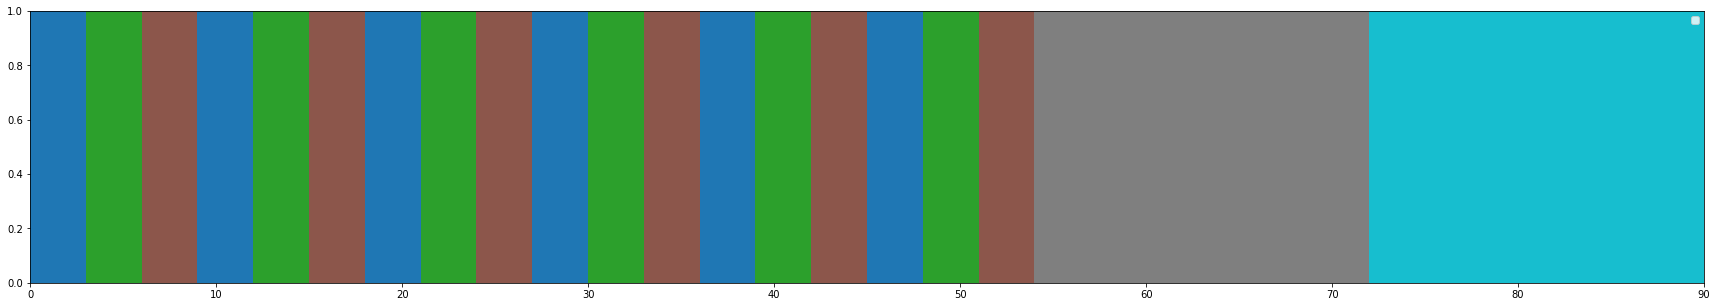

In [15]:
index_labels = [] # A list of labels for the indexes in label_index_list

for i in range(6):
    index_labels.extend([0,0,0,1,1,1,2,2,2,-1])

for i in range(18): index_labels.append(3)
index_labels.append(-1)

for i in range(18): index_labels.append(4)
index_labels.append(-1)

# New list with negative values removed list conprehension
index_labels_new = [x for x in index_labels if x != -1]





# Pcolormesh of index_labels where the labels are > 0
fig = plt.figure(figsize=(30, 5))
plt.pcolormesh(np.array(index_labels_new).reshape(1,-1),shading='auto',cmap='tab10')

# Add legend outside of the plot
plt.legend(['0', '1', '2', '3', '4'], loc='upper right')
plt.show()

In [16]:
# Add the sections to 5 lists corresponding to the 5 different labels/classes
''' 
Classes:
    Breathing: 0
    Snoring: 1
    Hold_breath: 2
    Chewing: 3
    Talking: 4
'''
fs = 50000
nested_class_list = [[],[],[],[],[]]


for datastream in data_bcm: # Loop through the data 
    for i, j in enumerate(label_index_list):
        if index_labels[i]>=0:
            nested_class_list[index_labels[i]].append(datastream[j:j+fs*10]) # Append 

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
class_label_list = ['Breathing', 'Snoring', 'Hold_breath', 'Chewing', 'Talking']

# Concatenate the arrays, calc mfccs and save them to files
for i, j in enumerate(nested_class_list):
    stacked_array = np.hstack(j)
    
    # Plot the stacked array
    '''fig = plt.figure(figsize=(30, 5))
    plt.plot(stacked_array, label=f'Data for label {i}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(which = 'minor')
    plt.show()'''
    
    # Create and save mfccs
    data_mfcc = mfcc(stacked_array, samplerate = fs, nfft = 1600, winlen=0.032, winstep=0.032, numcep=16) # Sample rate is important when using mel scale
    
    #plot_mfcc(data_mfcc)
    
    #np.save(f'data/bcm_alt_3/train/{i}.npy', data_mfcc)